# Bem vindos de volta :)

![](https://media.giphy.com/media/XoW4aVP3LhBaoB7FuJ/giphy.gif)

## Preparando o ambiente

Vamos retomar com o que tínhamos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATAPATH = '../data'

In [2]:
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numerical_cols = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "SalePrice",
]

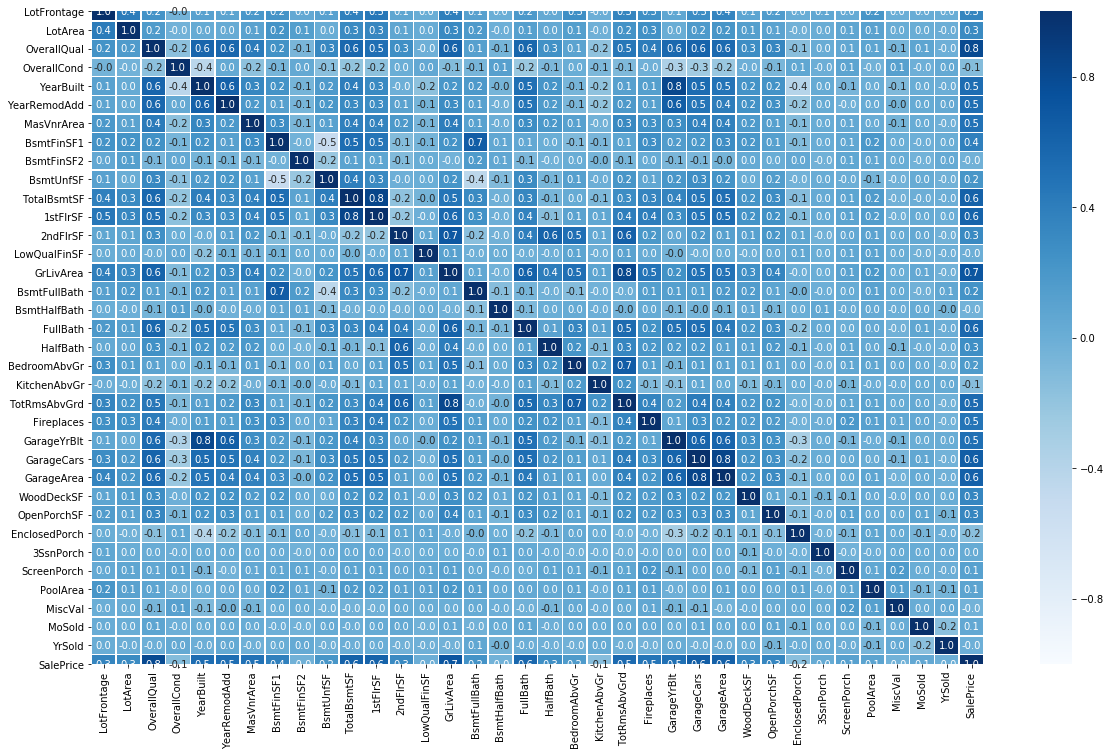

In [5]:
df_corr = data[numerical_cols].dropna().corr()
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, annot=True, fmt=".1f", linewidths=.5, cmap="Blues", 
            center=0, vmax=1.0, vmin=-1.0);

# O tal do modelo linear

Vimos no último vídeo do tópico passado que quando temos um *r*, ou *coeficiente de pearson* próximo de 1, nossos dados tem uma relação **linear** positiva, o que significa que podemos aplicar um modelo linear nele (o mesmo seria válido se o *r* fosse próximo de -1)

Olhando para o heatmap acima, e lembramos que **queremos prever o valor de casas**, a variável que tem o *r* mais alto é a OverallQual e a GrLivArea. Como a primeira é uma variável discreta e a segunda é contítnua, vamos plotar o scatterplot (ou gráfico de dispersão entre elas)?

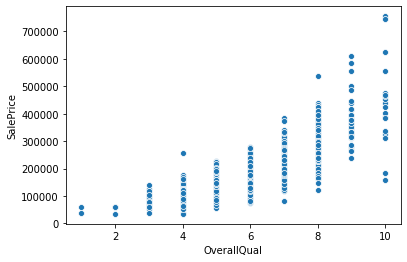

In [6]:
_ = sns.scatterplot(data['OverallQual'], data['SalePrice'])

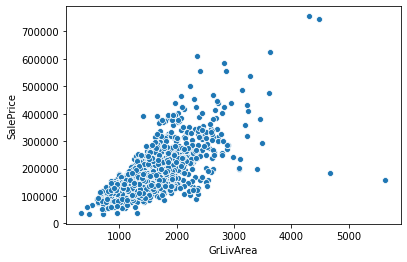

In [7]:
_ = sns.scatterplot(data['GrLivArea'], data['SalePrice'])

Por motivos de visualização, acho mais fácil seguirmos entre a relação da `GrLivArea` e o Sale Price. Relembrando:

- GrLivArea: Above grade (ground) living area square feet


Ou seja, vamos tentar prever o valor de **venda da casa** com relação à area da sala de estar! Como vamos fazer isso? Encontrando uma reta que represente bem esses dados!


Lembra da equação da reta?

$y=wx+b$


No caso, o $y$ é o **preço do aluguel** e o $x$ é a **área da sala de estar**

Ou seja, basta encontrar a angulação (ou coeficiente angular), $w$ e o coeficiente linear  (que localiza a reta), $b$.

Esse processo é conhecido como **regressão linear** :)

## Sopinha de Letras de Machine Learning

Quando falamos de Machine Learning, geralmente vamos cair em três casos:

- Aprendizado Surpervisionado (caso mais comum e exemplo desse Workshop)

- Aprendizado Não Surpervisionado

- Aprendizado por Reforço


![](../imgs/types-ml.png)


[Source](https://medium.com/deep-math-machine-learning-ai/different-types-of-machine-learning-and-their-types-34760b9128a2)

No caso de aprendizado surpervisionado, nós **temos** um conjunto de dados em que **sabemos** as respostas. No nosso exemplo **nós temos uma série de exemplos de preços de casas e queremos generalizar para casos nunca vistos**.

No caso do aprendizado não surpervisionado, nós **não** temos exemplos de resposta e aplicamos algoritmos que tentam "aprender" relações entre os dados para nos ajudar em alguma situação (por exemplo, visualização)

In [8]:
from IPython.display import YouTubeVideo

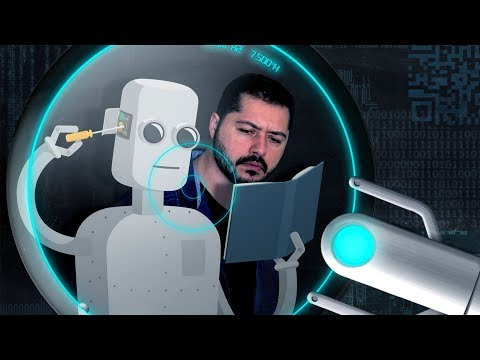

In [9]:
YouTubeVideo('mhe5e2B9bL8')

O que vocês acham do vídeo? 

Qual é problema que a gente tá tentando resolver???


<img src="https://media.giphy.com/media/aGOgOKmyBxCk8/giphy.gif" width="300">


Disclaimer: Deep Learning é **só** mais uma classe de algoritmos de aprendizado de máquinas


Regressão, então, é um tipo de problema de **aprendizado surpervisionado** em que tentamos prever um **número**. No caso, queremos prever **o valor das casas** com base na **area da sala de estar** por **meio de uma reta**. Por isso, então, é uma **regressão linear**!

# Aprendizado Surpervisionado

Sempre que falamos de aprendizado surpervisionado em Machine Learning, estamos falando de uma função que estamos tentando **otimizar**. Quando falamos de *otimização*, estamos nos referindo a algo que queremos minimizar ou maximizar. No nosso caso, queremos uma função $\hat{y} = f(x) = wx + b + \epsilon$, em que $\epsilon$ é o erro associado na nossa função (nunca teremos $f(x)=y$). Em outras palavras, queremos que o valor previsto, $\hat{y}$ seja muito próximo ao valor real, $y$. Em outras palavras, queremos **minimizar** a diferença entre o **valor previsto e o real**. 


Como queremos minimizar isso para todos os pontos que temos, isto é:

In [10]:
len(data)

1460

Para todos os 1460 pontos, podemos montar uma função de erro (também conhecida como função de custo, ou *cost function*) que deve ser minimizada. Em outras palavras, queremos que dados $m$ e $b$, o **erro seja o menor possível** 

Existem várias formas de fazer isso, mas vamos definir a seguinte:

- Calculamos a diferença entre o valor real e o predito, ou seja ($y - \hat{y}$)

- Como  para alguns pontos $y \geq \hat{y}$ e $y \leq \hat{y}$ para outros, os valores podem se anular. Então elevamos tudo ao quadrado, $(y - \hat{y})^2$

- Somamos para todos os pontos e tiramos a média. Em resumo, nosso erro é definido por:

$E = \frac{1}{n}\sum{ (y_i - \hat{y_i})^2}$, 

para cada $i$ do nosso dataset. Lembrando que queremos encontrar $m$ e $b$ e $\hat{y} = mx + b$, então:

$E = \frac{1}{n}\sum{ (y_i - (wx_i+b))^2}$


Ou seja, nós elevamos os erros ao quadrado e tiramos a média, daí o nome *Mean Squared Error*, uma função de custo muito famosa no campo de ML.

## Aprendendo a reta

Vamos chamar $w$ de peso (*weights*) e $b$ de bias (ou viés), para facilitar a notação. O que queremos agora, então, é desenvolver um algoritmo que aprenda o peso $w$ e o bias $b$, também conhecidos como **parâmetos** do nosso **modelo** 

Para ilustrar, vamos tentar imaginar o seguinte exemplo:

- Você está no topo de uma montanha e quer chegar no fundo dela o mais rápido possível e você não sabe muito bem como chegar
- Você, então, procura o caminho que tê dá a maior inclinação e você vai andando passo a passo
- Então, você dá passos largos se para descer a inclinação for pouco íngrime e passos mais estreitos se for menos íngrime


<img src="../imgs/gradient-descent-meme.jpeg" width="800"/>



Vamos chamar cada "passo" de época e a intensidade desse passo, de learning rate $L$.


O que queremos então, é **partir de um ponto arbitrário de w e b** e fazer "correções" nos seus valores, um passo de cada vez, até que o valor da nossa função de custo seja a menor possível.

Para facilitar, vamos começar com w=0 e b=0, mas eles poderiam ser qualquer coisa

In [11]:
x = data['GrLivArea']
y = data['SalePrice']
w=0.0 #needs to be float
b=0.0 #needs to be float


y_hat = w*x + b

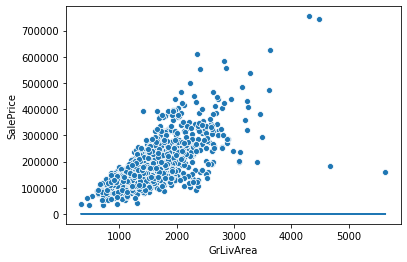

In [12]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

Não parece que essa reta teve um resultado muito bacana ):

Vamos definir nossa função de erro, como definimos mais cedo:

In [13]:
def predict(w, b, inputs):
    return w*inputs + b

In [14]:
inputs = x.values
targets = y.values
def loss(params_dict):
    preds = predict(params_dict['w'], params_dict['b'], inputs)
    return np.mean((targets-preds)**2)

In [15]:
loss({'w': w,'b': b})

39039267707.765755

Ótimo, agora como fazemos **uma alteração no nosso peso w** de forma que o **erro** seja reduzido?

Ora, essa é **exatamente** a interpretação da **derivada parcial do erro em relação a w**. Quando **falamos de derivadas** o que estamos tentando ver em, por exemplo, $\frac{df}{dx}$, como uma pequena mudança em $x$ altera o valor de $f$

**Como queremos calcular alterar os valores de w e b de forma a minimizar o erro, nós queremos as derivadas parciais da função de erro em relação a $w$ e a $b$**

A grande sacada aqui, é que o **gradiente** de uma função (no nosso caso, a função de erro), é a coleção de **todas as derivadas parciais em um vetor**. Ou seja, a cada passo, nós calculamos o gradiente da nossa função de custo e "corrigimos" o **w** e o **b** de forma a minimizar a função de erro.

Apesar de todos esses nomes, eu não vou entrar na matemática hoje (a ideia era só passar a intuição), até porquê muitos de vocês estão vendo cálculo 1 :)

Então eu vou **abstrair** toda a matemática do rolê :)

Na prática, o que vamos fazer é o seguinte:

![](../imgs/derivatives-ml.png)

Mas quem quiser, [aqui](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction); [aqui](https://pt.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives), [aqui](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) e [aqui](https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82#targetText=For%20supervised%20learning%2C%20models%20are,coefficients%20that%20minimize%20cost%20function.&targetText=The%20most%20commonly%20used%20loss,function%20is%20a%20parabola%20curve) tem ótimas referências

In [16]:
from jax import grad

In [17]:
gradients = grad(loss)({'w': w, 'b': b})

/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [18]:
gradients

{'b': DeviceArray(-361842.38, dtype=float32),
 'w': DeviceArray(-6.0748224e+08, dtype=float32)}

In [19]:
gradients['w'], gradients['b']

(DeviceArray(-6.0748224e+08, dtype=float32),
 DeviceArray(-361842.38, dtype=float32))

Agora a gente atualiza os valores de $w$ e $b$ com a constante learning rate, $L$, que no nosso caso vai ser 0.00000003

In [20]:
L = 0.00000003

In [21]:
w = w - L*gradients['w'] # subtraimos pq estamos querendo minimizar)
b = b - L*gradients['b'] # subtraimos pq estamos querendo minimizar)

w = w.copy() #retorna um array do numpy
b = b.copy()

In [22]:
y_hat = w*x + b

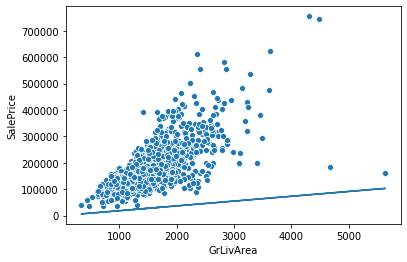

In [23]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

In [24]:
loss({'w': w,'b': b})

28822656055.387466

Nessa primeira rodada conseguimos fazer um ajuste da nossa reta e o nosso erro deu uma reduzida. O ideal é que rodemos esse algoritmos por um número $n$ de vezes, chamado épocas (ou epochs) e que ao final desse processo, **tenha ocorrido uma convergência**

In [25]:
from tqdm import tqdm_notebook

In [26]:
epochs = 1000  # The number of iterations to perform gradient descent

for i in tqdm_notebook(range(epochs)):
    gradients = grad(loss)({'w': w, 'b': b})
    w = w - L*gradients['w'] 
    b = b - L*gradients['b'] 
    w = w.copy()
    b = b.copy()

In [27]:
y_hat = w*x + b

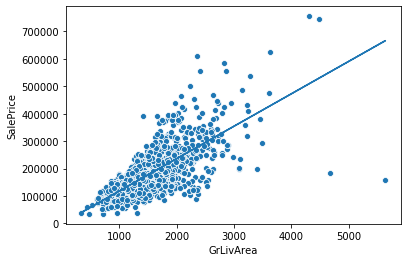

In [28]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

In [29]:
loss({'w': w,'b': b})>11629472613.033136

False

![](https://media.giphy.com/media/JqDeI2yjpSRgdh35oe/giphy.gif)


Conseguimos! Teoricamente encontramos o menor erro possível da nossa função! Essa técnica de otimização é conhecida como **Gradiente Descendente** (*Gradient Descent*) e é muito comum utilizá-la para otimizar *diferentes* modelos ! Principalmente quando temos um volume de dados muito grande :)

Mas podemos levantar uma série de dúvidas agora:

- Como escolher a epoch e o learning rate
- Como saber se o modelo é bom?
- Fizemos tudo certo?
- Podemos fazer de uma forma mais eficiente?

### Epoch e Learning rate

Epoch e Learning rate são exemplos de variáveis conhecidas como **hiperparâmetros**. Basicamente são variáveis que **não** são aprendidas e sim são setadas pelo usuário. Nesse caso, em geral, temos que:

- Epochs suficientemente grande para **garantir** convergência, mas que não demore uma década para rodar

- O Learning rate é a intensidade da nossa iteração. Se ele for muito baixo, pode demorar **muito** para convergir


![](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif)
[Source](https://alykhantejani.github.io/images/gradient_descent_line_graph.gif)


Em contrapartida, se ele for alto, ele pode não chegar em algum mínimo

![](https://im.ezgif.com/tmp/ezgif-1-fb60903ab90a.gif)
[Source](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=562s)


Geralmente usamos algo entr 1e-2 e 1e-6, mas **depende muito** do nosso dataset (vide nosso exemplo)

In [30]:
1e-2, 1e-6

(0.01, 1e-06)

## O modelo é bom?

### Métricas de Regressão

Existem diversas métricas que podemos usar para avaliar os modelos de regressão. Em geral, quando falamos de *Machine Learning* e *Aprendizado Surpervisionado*, temos uma métrica que queremos **otimizar** e métricas que dizem o **quão bom nosso modelo é**. [Source](https://www.deeplearningbook.org/contents/optimization.html)


Especificamente, quando falamos de regressão, vamos focar em três métricas populares, apesar de existirem outras:

- MSE

$\frac{1}{n}\sum{(\epsilon)^2}$, em que $\epsilon=(y_i - \hat{y}_i)$

Nesse caso, é uma situação em que a **métrica otimizada** e a **métrica de avaliação** são as mesmas. A dificuldade se dá pela **interpretação** desse modelo, uma vez que **suas unidades são o quadrado do target**. Para solucionar isso podemos **tirar a raiz do mse**, o que nos leva a nossa segunda métrica

- RMSE

$\sqrt{\frac{1}{n}\sum{(\epsilon)^2}}$, em que $\epsilon=(y_i - \hat{y}_i)$


A vantagem desse caso é que esse tipo de métrica é facilmente interpretável **já que ela nos dá uma noção do erro na mesma unidade que o target**. No nosso exemplo, nosso MSE é:

In [31]:
loss({'w': w,'b': b})

3176827519.770412

Ao obtermos a raiz disso, temos que:

In [32]:
np.sqrt(loss({'w': w,'b': b}))

56363.35263068027

Ou seja, estamos errando, em média, em torno de 56 mil reais entre o valor real e o previsto. **Isso é bom ou ruim?**

Uma outra forma de pensar nas métricas, seria entender **a variância** do target que é explicada pelo modelo e a sua relação com a **variância do target em si**. Em outras palavras, queremos:

$\frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}}$, em que $\bar{y}$ é a média de $y$. A métrica derivada disso é o $R^2$, ou **coeficiente de determinação**, que é obtida por:

$R^2 = 1- \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}} $

Ela representa **o quanto que a variância do target é explicada pelo modelo se considerarmos a média**. Em outras palavras, se prevermos sempre a média, termos um $R^2$ de 0. Se tivermos uma previsão **melhor** que a média teremos um $R^2$ positivo e, no máximo, 1 e caso contrário, teremos um $R^2$ negativo.

No nosso caso:

In [33]:
r_squared = 1 - np.sum((y-y_hat)**2)/np.sum((y-np.mean(y))**2)

In [34]:
r_squared

0.49628444385305726

Para facilitar nosso trabalho para casos futuros, vamos usar uma biblioteca que **implementa** essas métricas pra gente não precisar ficar calculando o tempo todo

In [35]:
from sklearn.metrics import r2_score, mean_squared_error

def obtain_metrics(y_true, y_pred):
    print(f"R2 do Modelo: {r2_score(y_true, y_pred)}")
    print(f"MSE do Modelo: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE do Modelo: {np.sqrt(mean_squared_error(y_true, y_pred))}")

In [36]:
obtain_metrics(y, y_hat)

R2 do Modelo: 0.49628444385305726
MSE do Modelo: 3176827519.770412
RMSE do Modelo: 56363.35263068027


Os resultados foram exatamente os mesmos que obtivemos, o que é um bom sinal :)

## Fizemos tudo certo?

### Premissas da Regressão Linear

Um modelo de regressão linear tem uma série de premissas que devemos respeitar para ser uma regressão válida:

- O valor esperado (a média da população) dos erros é zero

- O erro aleatório tem a mesma variância finita, propriedade chamada de homoeasticidade. Mais [aqui](http://www.portalaction.com.br/analise-de-regressao/32-diagnostico-de-homocedasticidade#targetText=Homocedasticidade%20%C3%A9%20o%20termo%20para,erros%20experimentais%20para%20observa%C3%A7%C3%B5es%20distintas.)

- Os erros são decorrelacionados


Esses dois últimos casos são encontrados por meio de um método chamado de análise de resíduos, que são tecnicas usadas para verificar se a regressão foi válida. Isso vai além do escopo dessa aula e [aqui](https://www.youtube.com/watch?v=gLENW2AdJWg) tem uma referência bacana

Porém, uma forma rápida de ver se encontramos a reta ideal da regressão linear é verificar se a média dos erros é 0.

In [37]:
(y - y_hat).mean().round(4)

1991.7113

![](https://media.giphy.com/media/CDJo4EgHwbaPS/giphy.gif)

## Fizemos algo de Errado?

Não! A idéia por trás do Gradiente Descendente é que ele nos dá uma **solução aproximada** da ideal, uma vez que ele é um método **iterativo**. Ele pode convergir para a solução ideal, dependendo dos nossos hiperparâmetos. As vezes queremos uma solução aproximada porquê é **impossível** computar a ideal.

### Outros métodos

#### Ordinary Least Squares

Uma outra forma de encontrar os parâmetos $w$ e $b$ no caso da **regressão linear** é um método numérico chamado de **Método dos Mínimos Quadrados** ou **Mínimos Quadrados Ordinários** (Ordinary Least Squares, ou OLS) que é um método não iterativo, em que é possível encontrar os parâmetros de uma forma algébrica (ou seja, por meio de conta).

Não vou entrar nos detalhes de porquê ele funciona, mas existe um [teorema](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) que **garante que os parâmetos encontrados** por ele satisfazem as propriedades da regressão e, além disso, são os melhores possíveis.

Também não vou entrar nos detalhes matemáticos, mais detalhes disso podem ser vistos [aqui](https://mlcourse.ai/articles/topic4-part1-linreg/) e [aqui](https://matheusfacure.github.io/2017/02/15/MQO-formula-analitica/)

Mas em suma o que queremos é resolver essa equação aqui:

![](../imgs/ols-equation.png)


Em que w será uma matriz com o $w$ **e** o $b$ que definimos anteriormente. Mostrando em código

In [38]:
x_reshaped = x.values.reshape(
    -1, 1
)  # precisamos transoformar um vetor em uma matriz de uma dimensão

x_reshaped_with_bias = np.insert(
    x_reshaped, 0, 1, 1
)  # adiciona o b para tratar tudo como multiplicacao de matriz

In [39]:
x_reshaped_with_bias

array([[   1, 1710],
       [   1, 1262],
       [   1, 1786],
       ...,
       [   1, 2340],
       [   1, 1078],
       [   1, 1256]])

In [40]:
weights_biases = np.dot(
    np.dot(
        np.linalg.inv(np.dot(x_reshaped_with_bias.T, x_reshaped_with_bias)),
        x_reshaped_with_bias.T,
    ),
    y,
)

In [41]:
b = weights_biases[0]
w = weights_biases[1:]

In [42]:
w, b

(array([107.13035897]), 18569.025856486947)

In [43]:
y_pred = w*x + b

In [44]:
(y -  y_pred).mean().round(4)

0.0

### A magia fo fit predict

<img src="../imgs/machine-learning-meme.png" width="450">


**É extremamente importante que tenhamos o conhecimento de como as coisas funcionam debaixo dos panos**

Mas é relativamente custoso ficar calculando essas coisas na unha o tempo todo. Felizmente, existe a biblioteca scikit-learn, que implementa uma **série** de métodos de Machine Learning pra gente :)

E um deles é justamente o OLS que acabamos de calcular acima!

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(x_reshaped, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lr.intercept_, lr.coef_

(18569.02585648728, array([107.13035897]))

In [49]:
(y - lr.predict(x_reshaped)).mean().round(4)

0.0

In [50]:
np.allclose(lr.intercept_,b), np.allclose(lr.coef_,w)

(True, True)

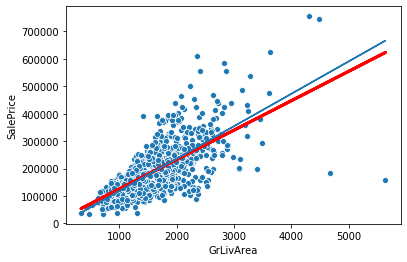

In [51]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, lr.predict(x_reshaped), color="r", lw=3)
plt.plot(x, y_hat);

In [52]:
(y - lr.predict(x_reshaped)).mean().round(4)

0.0

E agora vamos calcular as métricas

In [53]:
obtain_metrics(y, lr.predict(x_reshaped))

R2 do Modelo: 0.5021486502718042
MSE do Modelo: 3139843209.6665273
RMSE do Modelo: 56034.303865279944


O RMSE e o R2 melhoraram um pouco

![](https://media.giphy.com/media/3osxYlhbYjOIDEZhkI/giphy.gif)

### Porquê dois métodos diferentes?

Apesar do método de OLS nos garantir dar a solução ótima, perceba que ele **carrega a transposta da matriz em memória**, fora que que inverter $X^TX$, todas essas operações são caras e dependendo dos casos, **inviáveis**

> The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.

>The formula looks very simple, even computationally, because it only works for univariate case, i.e. when you have only one variable. In the multivariate case, when you have many variables, the formulae is slightly more complicated on paper and requires much more calculations when you implement it in software.

>Here, you need to calculate the matrix 𝑋′𝑋 then invert it (see note below). It's an expensive calculation. For your reference, the (design) matrix X has K+1 columns where K is the number of predictors and N rows of observations. In a machine learning algorithm you can end up with K>1000 and N>1,000,000. The 𝑋′𝑋 matrix itself takes a little while to calculate, then you have to invert 𝐾×𝐾 matrix - this is expensive.

[Source](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution)


Ou seja, quando trabalhamos com apenas uma varável independente (o nosso x), a solução pode até ser viável, mas quando estamos trabalhando com **múltiplas variáveis independentes**. Ou seja, nosso $x$ agora é $X$, uma matriz, dependendo do número de variáveis, a computação é **muito cara** e encontrar os parâmetros da nossa regressão é mais barato por meio de um método de aproximação como o Gradiente Descent.

# Melhorando o Modelo

## A Regressão Multipla

Uma forma de melhorar o nosso modelo é **incorporar mais variáveis** nele. Como vimos, o nosso modelo de regressão era definido por $f(x) = w*x + b + \epsilon$

Podemos incrementá-lo da seguinte forma:

$f(X) = b + w_1*X_{1i} + w_2*X_{2i} + w_3*X_{3i} + \dots + w_m*X_{mi} + \epsilon$

Vamos chamar $b=w_0$ para simplificar notação. Ou seja, temos: 

$f(X) = w_0 + w_1*X_{1i} + w_2*X_{2i} + w_3*X_{3i} + \dots + w_m*X_{mi} + \epsilon$

Em outras palavras, cada um dos nossos $m$ X são **variáiveis independentes diferentes** (ou **features**) e os $m$ w's (junto com o $w_0$) são os parâmetros que queremos aprender.

Se vocês lembram de MVGA, essa equação acima é uma **combinação linear** que pode ser escrita da seguinte forma:

$f(x) = w_0 + \sum^m_{i=1}{w_ix_i} + \epsilon_i$. Podemos fazer $w_0$ um vetor com todos os valores sendo 1 (já que vamos aprender o seu valor real, isso não é um problema) e aí temos:

$f(x) = \sum^m_{i=0}{w_ix_i} = w^Tx$, que pode ser reescrito como $f(x) = Xw + \epsilon$


Ou seja, essa **combinação linear** pode ser escrita como um **produto de matrizes** e, então, como temos matrizes, tanto o OLS quando o Gradient Descent são aplicáveis!


Para exemplificar, vamos considerar que nosso dataset tem três variáveis: `LotArea`; `GrLivArea` e `SalePrice`



In [54]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
simplified = data[['LotArea', 'GrLivArea', 'GarageCars', 'SalePrice']]
features = ['LotArea', 'GrLivArea']
target = ['SalePrice']

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(simplified[features], simplified[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lr.intercept_, lr.coef_

(array([16621.43123635]), array([[  0.66179816, 103.82284134]]))

Ou seja, o parâmetro $w_0$ (ou $b$) é $16621.43123635$; o parâmetro associado a variável `LotArea` ($w_1$) é $0.66179816$ e o parâmetro associado a variável `GrLivArea` ($w_2$) é $103.82284134$

### O modelo melhorou?

In [59]:
obtain_metrics(simplified[target], lr.predict(simplified[features]))

R2 do Modelo: 0.508583801640057
MSE do Modelo: 3099258070.4722357
RMSE do Modelo: 55670.98050575574


## Feature Scaling

Uma forma de lidar melhor com as variáveis quando estamos lidando com Regressão Múltipla, é **garantir** que elas estão sendo colocadas na mesma unidade. Por exemplo, suponha que além das features que usamos, também quisesemos usar a variável `GarageCars`

In [60]:
features = ['LotArea', 'GrLivArea', 'GarageCars']

In [61]:
simplified[features].head()

,LotArea,GrLivArea,GarageCars
Id,,,
1,8450,1710,2
2,9600,1262,2
3,11250,1786,2
4,9550,1717,3
5,14260,2198,3


Apesar das features `LotArea` e `GrLivArea` estarem na mesma unidade `square foot`, `GarageCars` e isso pode dificultar a computação para fazer os números convergirem. Isso não é o nosso caso, mas quando temos **muitas features** e **dados**, isso pode acabar acontecendo. Uma forma fácil de transformarmos os dados na mesma unidade é tirando por meio de $x = \frac{(x - \mu)}{\sigma}$

Ou seja, tiramos a média e dividimos pelo desvio padrão. Conseguimos fazer isso por meio do método `StandardScaler` do `Sklearn`

Esse tipo de transormação é conhecida como **transformação linar** e ela pode ser "revertida"

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
standard_features = StandardScaler()
standard_target = StandardScaler()

In [64]:
standard_features.fit(simplified[features])
standard_target.fit(simplified[target])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
transformed_features = standard_features.transform(simplified[features])
transformed_target = standard_target.transform(simplified[target]) #separamos para poder voltar depois

In [66]:
transformed_features = pd.DataFrame(
    transformed_features, columns=simplified[features].columns, index=simplified.index
)

In [67]:
transformed_features

,LotArea,GrLivArea,GarageCars
Id,,,
1,-0.207142,0.370333,0.311725
2,-0.091886,-0.482512,0.311725
3,0.073480,0.515013,0.311725
4,-0.096897,0.383659,1.650307
5,0.375148,1.299326,1.650307
...,...,...,...
1456,-0.260560,0.250402,0.311725
1457,0.266407,1.061367,0.311725
1458,-0.147810,1.569647,-1.026858


In [68]:
lr.fit(transformed_features[features], transformed_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lr.intercept_, lr.coef_

(array([1.57276501e-16]), array([[0.06967243, 0.5067352 , 0.39284826]]))

In [70]:
obtain_metrics(
    simplified[target],
    standard_target.inverse_transform(lr.predict(transformed_features[features])),
)

R2 do Modelo: 0.6290512133910641
MSE do Modelo: 2339495573.13441
RMSE do Modelo: 48368.332337743566


Vamos comparar sem as transformações

In [71]:
lr.fit(simplified[features], simplified[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.intercept_, lr.coef_

(array([-14805.65764718]),
 array([[5.54534143e-01, 7.66085922e+01, 4.17613040e+04]]))

In [73]:
5.54534143e-01, 7.66085922e+01, 4.17613040e+04

(0.554534143, 76.6085922, 41761.304)

In [74]:
obtain_metrics(simplified[target], lr.predict(simplified[features]))

R2 do Modelo: 0.6290512133910641
MSE do Modelo: 2339495573.13441
RMSE do Modelo: 48368.332337743566


Como estamos usando o OLS, os resultados deram iguais :)

Contudo, esse tipo de coisa é **bastante útil** se usarmos um método iterativo, como o Gradient Descent, que precisa convergir por meio de iterações

## Lidando com Valores Nulos

Modelos Lineares como no caso de regressores tem dificuldades de lidar com dados nulos. Por exemplo, vamos considerar que a variável `LotFrontAge` deve entrar no modelo

In [75]:
data['LotFrontage'].isna().sum()

259

In [76]:
features = ['LotArea', 'GrLivArea', 'GarageCars', 'LotFrontage']
target = ['SalePrice']

In [77]:
simplified = data[features+target]
lr.fit(simplified[features], simplified[target])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Uma forma de lidarmos com isso é **dropando** os nulos com `data['LotFrontage'].dropna()`, por exemplo. Ou **preenchendo os valores nulos**

In [78]:
data['LotFrontage'].isna().sum()/len(data['LotFrontage'])

0.1773972602739726

Como aproximadamente 17% dos dados é nulo, vamos preencher os dados, uma vez que parece ser uma quantidade considerável para jogarmos fora

In [79]:
values = simplified['LotFrontage'].mean()

In [80]:
simplified.fillna(values, inplace=True)

/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [81]:
simplified['LotFrontage'].isna().sum()

0

In [82]:
lr.fit(simplified[features], simplified[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
obtain_metrics(simplified[target], lr.predict(simplified[features]))

R2 do Modelo: 0.6295921010540988
MSE do Modelo: 2336084308.9952264
RMSE do Modelo: 48333.0560692703


## Variávies Dummy

Vimos até agora nesse modelo como ele funciona com variáveis que são números, mas e as variáveis que são categorias?

In [84]:
categorical_features = list(set(data.columns) - set(numerical_cols))

In [85]:
data[categorical_features].head()

,Neighborhood,Condition2,BsmtCond,BsmtExposure,Alley,GarageType,GarageFinish,Street,PavedDrive,LotShape,...,CentralAir,SaleCondition,MSSubClass,RoofMatl,ExterCond,GarageQual,Electrical,MiscFeature,MSZoning,LotConfig
Id,,,,,,,,,,,,,,,,,,,,,
1,CollgCr,Norm,TA,No,NaN,Attchd,RFn,Pave,Y,Reg,...,Y,Normal,60,CompShg,TA,TA,SBrkr,NaN,RL,Inside
2,Veenker,Norm,TA,Gd,NaN,Attchd,RFn,Pave,Y,Reg,...,Y,Normal,20,CompShg,TA,TA,SBrkr,NaN,RL,FR2
3,CollgCr,Norm,TA,Mn,NaN,Attchd,RFn,Pave,Y,IR1,...,Y,Normal,60,CompShg,TA,TA,SBrkr,NaN,RL,Inside
4,Crawfor,Norm,Gd,No,NaN,Detchd,Unf,Pave,Y,IR1,...,Y,Abnorml,70,CompShg,TA,TA,SBrkr,NaN,RL,Corner
5,NoRidge,Norm,TA,Av,NaN,Attchd,RFn,Pave,Y,IR1,...,Y,Normal,60,CompShg,TA,TA,SBrkr,NaN,RL,FR2


Uma boa forma de codificá-las é transformá-las em dummy variables: criamos uma coluna para cada opção e tratamos como variáveis binárias.

![](../imgs/one-hot.png)

Como exemplo, vamos considerar a variável `Neighborhood`

In [86]:
cat_feat = ['Neighborhood']
data[cat_feat]

,Neighborhood
Id,
1,CollgCr
2,Veenker
3,CollgCr
4,Crawfor
5,NoRidge
...,...
1456,Gilbert
1457,NWAmes
1458,Crawfor


In [87]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [88]:
enc.fit(data[cat_feat])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [89]:
enc.categories_

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object)]

In [90]:
simplified.head()

,LotArea,GrLivArea,GarageCars,LotFrontage,SalePrice
Id,,,,,
1,8450,1710,2,65.0,208500
2,9600,1262,2,80.0,181500
3,11250,1786,2,68.0,223500
4,9550,1717,3,60.0,140000
5,14260,2198,3,84.0,250000


In [91]:
neighbours_df = pd.DataFrame(
    enc.transform(data[cat_feat]).todense(),
    columns=enc.categories_[0],
    index=data[cat_feat].index,
)

In [92]:
new_simplified = pd.concat(
    [
        simplified,
        neighbours_df,
    ],
    axis=1,
)

In [93]:
new_simplified.head()

,LotArea,GrLivArea,GarageCars,LotFrontage,SalePrice,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,1710,2,65.0,208500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9600,1262,2,80.0,181500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11250,1786,2,68.0,223500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9550,1717,3,60.0,140000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14260,2198,3,84.0,250000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
new_simplified.shape

(1460, 30)

In [95]:
lr.fit(new_simplified[list(enc.categories_[0]) + features], new_simplified[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
obtain_metrics(
    new_simplified[target],
    lr.predict(new_simplified[list(enc.categories_[0]) + features]),
)

R2 do Modelo: 0.7628784156327406
MSE do Modelo: 1495475701.6273723
RMSE do Modelo: 38671.38091182383


In [97]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
data[['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual']]

,BedroomAbvGr,KitchenAbvGr,KitchenQual
Id,,,
1,3,1,Gd
2,3,1,TA
3,3,1,Gd
4,3,1,Gd
5,4,1,Gd
...,...,...,...
1456,3,1,TA
1457,3,1,TA
1458,4,1,Gd


In [99]:
sales_type = OneHotEncoder(handle_unknown="ignore")

sales_type_df = pd.DataFrame(
    sales_type.fit_transform(data[["SaleType"]]).todense(),
    columns=sales_type.categories_[0],
    index=data.index,
)
sales_type_df.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
Id,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
features = ['LotArea', 'GrLivArea', 'GarageCars', 'LotFrontage']

In [101]:
new_simplified = pd.concat(
    [
        data[features + target].fillna(data[features + target].mean()),
        neighbours_df,
        sales_type_df,
    ],
    axis=1,
)

In [102]:
new_simplified.head()

,LotArea,GrLivArea,GarageCars,LotFrontage,SalePrice,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,...,Veenker,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,1710,2,65.0,208500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9600,1262,2,80.0,181500,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11250,1786,2,68.0,223500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9550,1717,3,60.0,140000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,14260,2198,3,84.0,250000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
new_feat = (
    list(enc.categories_[0])
    + features
    + list(sales_type.categories_[0])
)

In [104]:
lr.fit(new_simplified[new_feat], new_simplified[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
obtain_metrics(
    new_simplified[target],
    lr.predict(new_simplified[new_feat]),
)

R2 do Modelo: 0.7716934386525598
MSE do Modelo: 1439881215.0663853
RMSE do Modelo: 37945.7667608178


# Exercício

Adicione features no seu modelo de regressão. Qual o melhor resultado que você consegue obter?

OBS: É possível obter **pelo menos** um R2 maior que 0.80 e um RMSE abaixo dos 35 mil